# Noise Reduction

## Table of Contents

1. [Introduction](#Introduction)
2. [Project Setup](#Setting-up-a-project)
3. [Noise Reduction Techniques](#Noise-Reduction-Techniques)
    1. [DeepFilterNet](#DeepFilterNet)
    2. [Spectral Gating](#SpectralGating)

## Introduction

Noise reduction is a crucial signal processing technique used to enhance the quality of signals by minimizing unwanted or irrelevant noise. This technique finds applications in various fields such as audio processing, image processing, telecommunications, and more. The goal is to extract the useful information from a signal while suppressing undesirable background noise.

In [1]:
import mlrun

## Setting up a project

First of all we need to create a project with the `noise-reduction` function

In [2]:
# Creating a project
project = mlrun.get_or_create_project("noise-reduction")
# Importing the function from hub
noise_reduction_function = project.set_function("hub://noise_reduction")

> 2024-03-04 15:54:53,561 [info] Project loaded successfully: {'project_name': 'noise-reduction'}


In [3]:
# Audio source can be either a single file or a directory of audio files
audio_source = "data"

## Noise Reduction Techniques

<a id="DeepFilterNet"></a>
### 1. DeepFilterNet
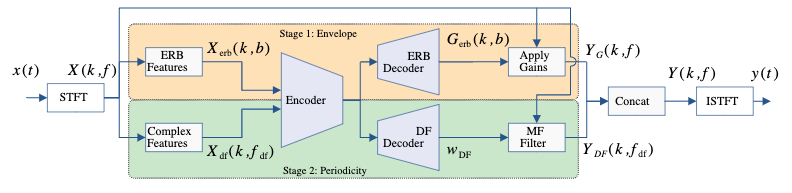

In order to use this technique, you simply need to use the `reduce_noise_dfn` handler.

Reduce noise from audio files using DeepFilterNet. For more information about the noise reduction algorithm, see [DeepFilterNet GitHub](https://github.com/Rikorose/DeepFilterNet). Notice that the saved files are in wav format, even if the original files are in other formats.

### Parameters:

- `audio_source`: path to the audio file or directory of audio files
- `target_directory`: path to the target directory to save cleaned audio files
- `pad`: whether to pad the audio file with zeros before cleaning
- `atten_lim_db`: maximum attenuation in dB
- `silence_threshold`: the threshold to remove silence from the audio, in dB. If None, no silence removal is performed.
- `use_multiprocessing`: Number of processes to use for cleaning the audio files. If 0, no multiprocessing is used.
- `verbose`: verbosity level. If True, display progress bar and logs.
- `kwargs`: additional arguments to pass to `torchaudio.load()`. For more information, see [torchaudio.load()](https://pytorch.org/audio/stable/generated/torchaudio.load.html).


In the examples below, the function is running locally, for running remotely, it is required to build the function's image first (need to execute only once):
```python
noise_reduction_function.apply(mlrun.auto_mount()) # required for local files
project.build_function("noise-reduction")
```

#### 1.1. Example

In [4]:
dfn_run = noise_reduction_function.run(
    handler="reduce_noise_dfn",
    inputs={"audio_source": audio_source},
    params={
        "target_directory": "./clean_data",
        "use_multiprocessing": 2,
        "silence_threshold": 50,
        "atten_lim_db": 10,
    },
    returns=["successes: file", "errors: file"],
    local=True,
)

> 2024-03-04 15:54:56,999 [info] Storing function: {'name': 'noise-reduce-reduce-noise-dfn', 'uid': '9732dac831784a6a8b53acab5ff83a08', 'db': 'http://mlrun-api:8080'}
> 2024-03-04 15:55:07,525 [info] logging run results to: http://mlrun-api:8080
> 2024-03-04 15:55:07,702 [info] Reducing noise from audio files.


Noise-reduction:   0%|          | 0/2 [00:00<?, ?file/s]`torchaudio.backend.common.AudioMetaData` has been moved to `torchaudio.AudioMetaData`. Please update the import path.


> 2024-03-04 15:55:08,437 [info] Loading DeepFilterNet2 model.


`torchaudio.backend.common.AudioMetaData` has been moved to `torchaudio.AudioMetaData`. Please update the import path.


2024-03-04 15:55:08 | INFO     | DF | Running on torch 2.1.2+cu121
2024-03-04 15:55:08 | INFO     | DF | Running on host jupyter-yoni-d56767c87-678n2
> 2024-03-04 15:55:08,464 [info] Loading DeepFilterNet2 model.
2024-03-04 15:55:08 | INFO     | DF | Running on torch 2.1.2+cu121
2024-03-04 15:55:08 | INFO     | DF | Running on host jupyter-yoni-d56767c87-678n2
2024-03-04 15:55:08 | INFO     | DF | Loading model settings of DeepFilterNet3
2024-03-04 15:55:08 | INFO     | DF | Using DeepFilterNet3 model at /igz/.cache/DeepFilterNet/DeepFilterNet3
2024-03-04 15:55:08 | INFO     | DF | Initializing model `deepfilternet3`
2024-03-04 15:55:08 | INFO     | DF | Loading model settings of DeepFilterNet3
2024-03-04 15:55:08 | INFO     | DF | Using DeepFilterNet3 model at /igz/.cache/DeepFilterNet/DeepFilterNet3
2024-03-04 15:55:08 | INFO     | DF | Initializing model `deepfilternet3`
2024-03-04 15:55:08 | INFO     | DF | Found checkpoint /igz/.cache/DeepFilterNet/DeepFilterNet3/checkpoints/model

2024-03-04 15:55:08 | WARNING  | DF | Audio sampling rate does not match model sampling rate (16000, 48000). Resampling...
"sinc_interpolation" resampling method name is being deprecated and replaced by "sinc_interp_hann" in the next release. The default behavior remains unchanged.
The MPEG_LAYER_III subtype is unknown to TorchAudio. As a result, the bits_per_sample attribute will be set to 0. If you are seeing this warning, please report by opening an issue on github (after checking for existing/closed ones). You may otherwise ignore this warning.
2024-03-04 15:55:08 | WARNING  | DF | Audio sampling rate does not match model sampling rate (16000, 48000). Resampling...
"sinc_interpolation" resampling method name is being deprecated and replaced by "sinc_interp_hann" in the next release. The default behavior remains unchanged.


> 2024-03-04 15:55:16,701 [info] Saved cleaned audio file to clean_data/test_data.wav.
> 2024-03-04 15:55:16,706 [info] Saved cleaned audio file to clean_data/test_data_mp3.wav.


Noise-reduction: 100%|██████████| 2/2 [00:09<00:00,  4.51s/file]

> 2024-03-04 15:55:16,791 [info] Summarizing the results.
> 2024-03-04 15:55:16,792 [info] Done (2/2)



> 2024-03-04 15:55:17,976 [info] Run execution finished: {'status': 'completed', 'name': 'noise-reduce-reduce-noise-dfn'}


### Looking at the result

In [5]:
dfn_run.artifact("successes").show()
dfn_run.artifact("errors").show()

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

<a id="SpectralGating"></a>
### 2. Spectral Gating
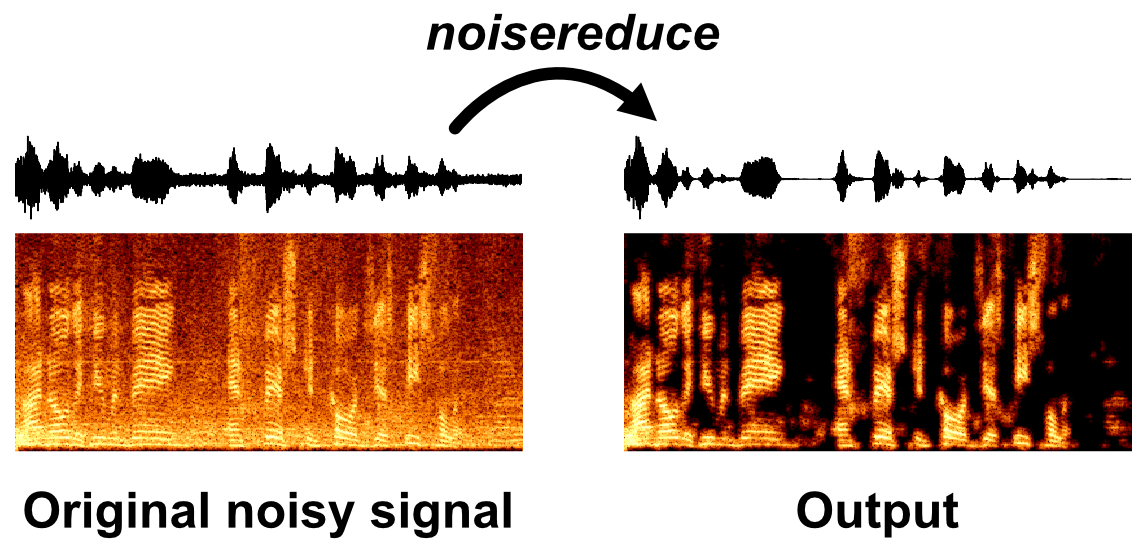

In order to use this technique, you simply need to use the `reduce_noise` handler.

Spectral gating selectively filters signal frequencies based on amplitude, offering targeted noise reduction or feature enhancement in signal processing applications.

Reduce noise from an audio file or directory containing audio files. The audio files must be in .wav format. The cleaned audio files will be saved in the target directory. For information about the noise reduction algorithm, see [noisereduce GitHub](https://github.com/timsainb/noisereduce). Notice that the saved files are in .wav format, even if the original files are in another format.

### Parameters:

- `audio_source`: path to the audio file or directory containing audio files
- `target_directory`: path to the directory to save the cleaned audio files.
- `sample_rate`: Number of samples in one second in the audio file. Pass `None` to keep the original sample rate.
- `duration`: Duration of the audio file to clean in seconds. Pass `None` to keep the original duration.
- `channel`: Channel to clean. Pass the number of the channel to clean. To clean all channels, pass `None`.
- `silence_threshold`: The threshold to remove silence from the audio, in dB. If `None`, no silence removal is performed.
- `use_multiprocessing`: Number of processes to use for cleaning the audio files. If 0, no multiprocessing is used.
- `verbose`: Verbosity level. If True, display a progress bar.

#### 2.1. Example

In [6]:
noise_reduction_run = noise_reduction_function.run(
    handler="reduce_noise",
    inputs={"audio_source": audio_source},
    params={
        "target_directory": "./clean_data",
        "use_multiprocessing": 2,
        "silence_threshold": 50,
    },
    local=True,
    returns=["successes: file", "errors: file"],
)

> 2024-03-04 16:07:39,378 [info] Storing function: {'name': 'noise-reduce-reduce-noise', 'uid': '6e6d6f7c3f8243b995dc1bbcf66f7544', 'db': 'http://mlrun-api:8080'}
> 2024-03-04 16:07:39,541 [info] Reducing noise from audio files.


Noise-reduction:   0%|          | 0/2 [00:00<?, ?file/s]

> 2024-03-04 16:07:39,565 [info] Reducing noise from test_data.mp3.
> 2024-03-04 16:07:39,566 [info] Reducing noise from test_data.wav.
> 2024-03-04 16:07:46,174 [info] Saved cleaned audio file to clean_data/test_data.wav.
> 2024-03-04 16:07:46,175 [info] Saved cleaned audio file to clean_data/test_data_mp3.wav.


Noise-reduction: 100%|██████████| 2/2 [00:06<00:00,  3.31s/file]

> 2024-03-04 16:07:46,211 [info] Summarizing the results.
> 2024-03-04 16:07:46,212 [info] Done (2/2)



> 2024-03-04 16:07:46,389 [info] Run execution finished: {'status': 'completed', 'name': 'noise-reduce-reduce-noise'}


### Looking at the result

In [7]:
dfn_run.artifact("successes").show()
dfn_run.artifact("errors").show()

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

The output of this function is the same as the first one.